<a href="https://colab.research.google.com/github/Purinkai001/Train/blob/main/Banglore_traffic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('/content/Banglore_traffic_Dataset.csv')
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [7]:
heatmap_data = df.pivot_table(values='Traffic Volume',index = 'Area Name',columns='Road/Intersection Name',aggfunc='sum')
import plotly.express as px
import plotly.graph_objects as go
fig = px.imshow(heatmap_data)
fig.show()

In [8]:
fig = px.sunburst(df,path=['Area Name','Road/Intersection Name'],values='Traffic Volume')
fig.show()

In [7]:
fig = px.scatter(df,x='Traffic Volume', y ='Average Speed', color='Congestion Level', size ='Traffic Volume', hover_data=['Area Name', 'Road/Intersection Name'])
fig.show()

<Axes: xlabel='Area Name', ylabel='Travel Time Index'>

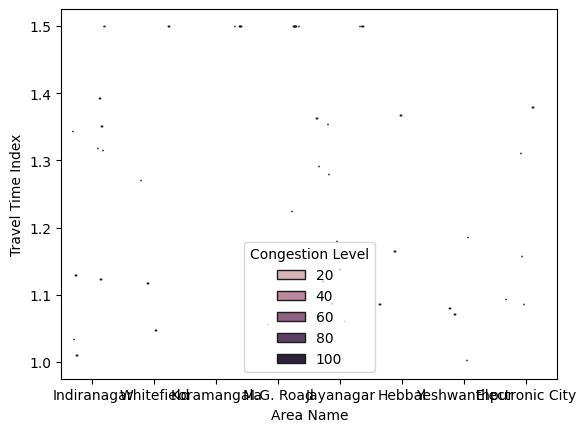

In [5]:
#Boxplotyay
fig = sns.boxplot(x='Area Name', y='Travel Time Index', data=df, hue='Congestion Level')

fig.show()

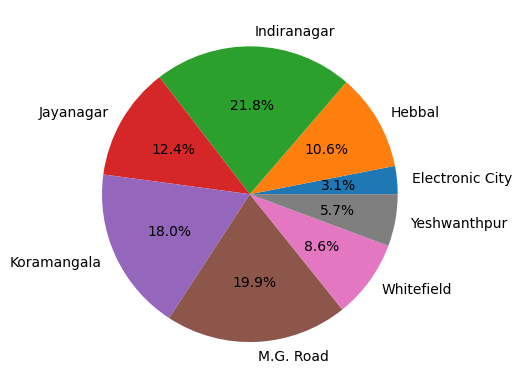

<Figure size 2400x1000 with 0 Axes>

In [13]:
incident_data = df.groupby('Area Name')['Incident Reports'].sum().reset_index()
fig = px.pie(incident_data, values='Incident Reports', names='Area Name',
             title="Pie Chart of Incident Reports by Area")
fig.show()
pieplt = plt.pie(incident_data['Incident Reports'], labels=incident_data['Area Name'], autopct='%1.1f%%')
plt.figure(figsize=(24,10))
plt.show()

In [16]:
fig = px.histogram(df,x='Road Capacity Utilization')
fig.show()

In [18]:
congestion_data = df.groupby('Area Name')['Congestion Level'].mean().reset_index()
fig = px.bar(congestion_data, x='Area Name', y='Congestion Level',
             title="Average Congestion Level by Area")
fig.show()
fig2 = px.bar_polar(congestion_data, r='Congestion Level', theta='Area Name',
             title="Average Congestion Level by Area")
fig2.show()

In [20]:
fig = px.density_contour(df,x='Average Speed',y='Traffic Volume')
fig.show()

# K-Means Clustering or something I'll update when I understand

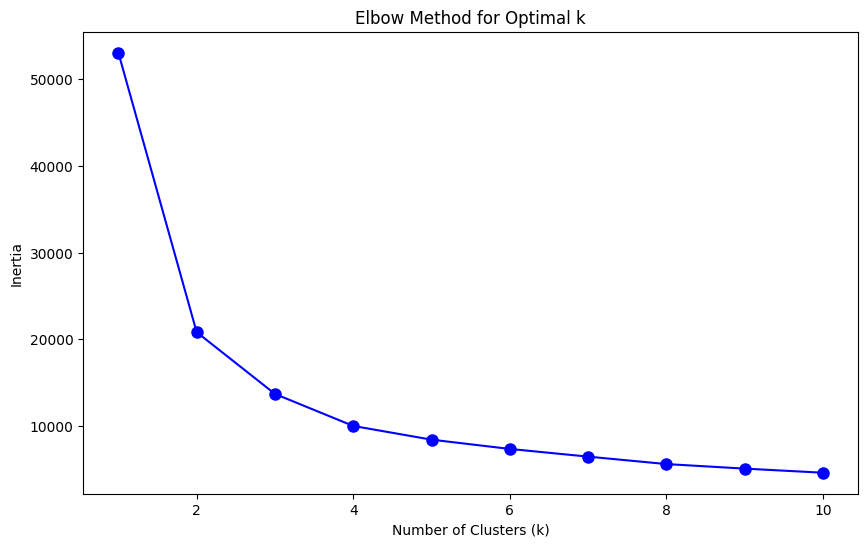

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

numerical_columns = [
    'Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level',
    'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
    'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
    'Pedestrian and Cyclist Count'
]
numerical_data = df[numerical_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
# can literally see that optimal k is around 2-4 or maybe 4 is a bit overkill?

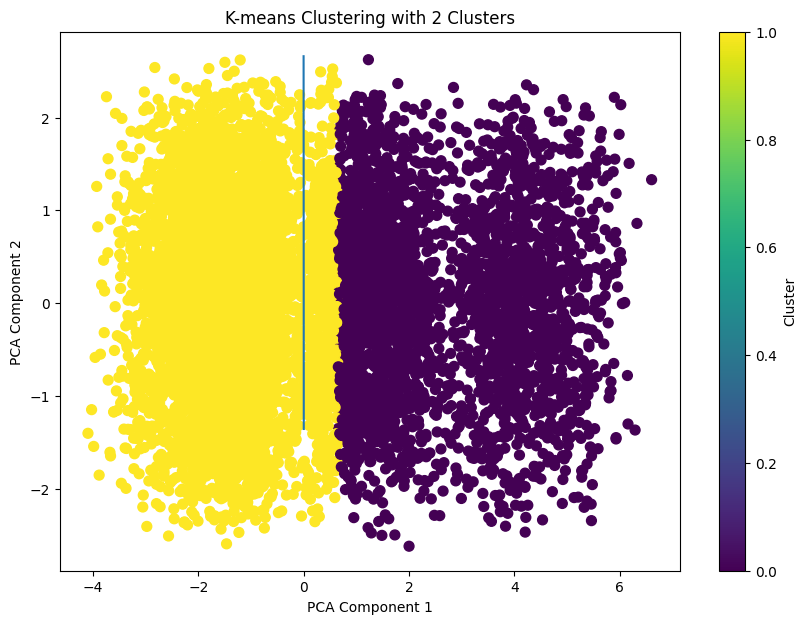

In [38]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_data)
df['Cluster'] = kmeans.labels_

# Visualize the Clusters
plt.figure(figsize=(10, 7))

cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers)
y = cluster_centers_df[:][0]
x = cluster_centers_df[:][1]
plt.plot(x,y)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
#what?
